## Ejercicio 2

Trabajar con el dataset de Diabetes

In [61]:
# Imports
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

Cargamos el dataset i leemos su descripción

In [87]:
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print(diabetes.keys()) # Para saber que obtenemos al descargar el conjunto de datos

print(diabetes.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - 

Vamos a realizar un :

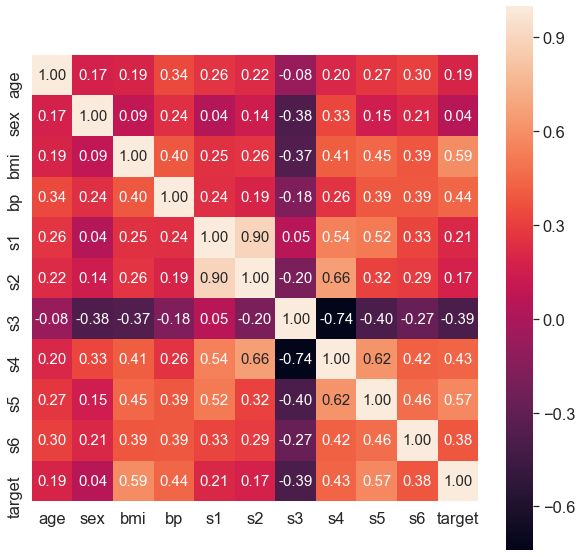

In [100]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df[df.columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15}, yticklabels=df.columns, xticklabels=df.columns)
plt.show();

**Ejercicio**
- Realiza una regresión Lasso con todas las características. Debes seleccionar el mejor valor para el hiperparàmetro _alpha_ en el rango $10^{-6}$, 100.

- Muestra por pantalla el mejor _alpha_ i el mejor _score_

- Realiza un plot donde muestres los residuos (la diferencia entre los valores reales y la predicción) frente a los valores predichos. Como es esta distribución?

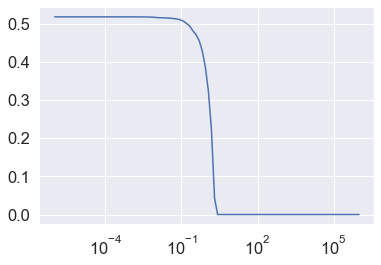

In [124]:
from sklearn.linear_model import Lasso

X = diabetes.data
y = diabetes.target

alphas = np.logspace(-6, 6, 100)

scores = []
best = (0,0)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y);
    sc = lasso.score(X,y)
    scores.append(sc)
    if sc > best[0]:
        best = sc, alpha
    
plt.plot(alphas, scores)
#plt.xscale("log")
plt.show()

In [129]:
lasso = Lasso(alpha=best[1])
lasso.fit(X, y);
sc = lasso.score(X,y)
print(sc, best[1])

0.5177494253788464 1e-06


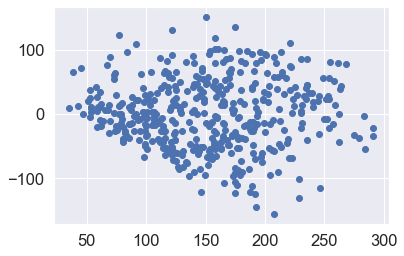

In [122]:
y_predict = lasso.predict(X)

plt.scatter(y_predict, y-y_predict);

**Ejercicio 2**

Vamos a hacer una segunda versión sobre este ejercicio usando una Regresión polinómica:

- Crea un polinomio de grado 1 y compara el resultado con el obtenido con la regressión LASSO. Que sucede?
- Crea polinómios de grados mayores, que sucede con el _score_ ?

In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [140]:
X = diabetes.data
y = diabetes.target

polynomial_features = PolynomialFeatures(8)

linear_regression = LinearRegression()
polynomial = polynomial_features.fit_transform(X)
    
linear_regression.fit(polynomial, y)

sc_p = linear_regression.score(polynomial, y)



1.0

**Ejercicio 3**

Evidentemente parece que lo que estamos consiguiendo es realizar overfitting sobre el conjunto de datos. Los dividimos en dos conjuntos usando la función  `train_test_split` y de esta manera obtendremos un conjunto de test. Ver documentación [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split)

Trabajaremos con una métrica diferente MSE [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean%20squared%20error#sklearn.metrics.mean_squared_error)

- Dividir el conjunto de datos y los valores objetivo en 2 conjuntos. Nos quedaremos el 70% para entrenamiento.
- Probar regresiones polinómicas con diferentes grados. Nos quedaremos con la que tenga mejor MSE en el conjunto de test. 
- Realiza un plot donde se vea la evolución del MSE en el conjunto de test.
- Añade el MSE del conjunto de entrenamiento. Que podemos observar?

_Nota:_ Intenta automatizar el proceso realizando un bucle sobre el grado del polinómio



In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

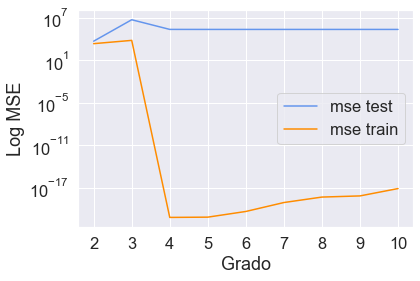

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

mse_train = []
mse_test = []

grados = range(2, 11)

for i in grados:
    polynomial_features = PolynomialFeatures(i)

    linear_regression = LinearRegression()
    polynomial_train = polynomial_features.fit_transform(X_train)
    polynomial_test = polynomial_features.transform(X_test)
    
    
    linear_regression.fit(polynomial_train, y_train)
    y_pred = linear_regression.predict(polynomial_test)
    y_pred_train = linear_regression.predict(polynomial_train)

    sc_p = mean_squared_error(y_test, y_pred)
    sc_t = mean_squared_error(y_train, y_pred_train)
    
    mse_train.append(sc_t)
    mse_test.append(sc_p)
    
    
plt.plot(grados, mse_test, color="cornflowerblue", label="mse test")
plt.plot(grados, mse_train, color="darkorange", label="mse train")
plt.yscale("log")
plt.xticks(grados)
plt.ylabel("Log MSE")
plt.xlabel("Grado")
plt.legend()
plt.show()
